# LSST Air Transparency for a pure molecular scattering sky

- author Sylvie Dagoret-Campagne
- creation date Satuday 29 October 2016


The purpose is to compare the air transparency for pure molecular scattering (Rayleigh)

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline

/Users/dagoret-campagnesylvie/.local/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import pandas as pd
import os
import re

In [3]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

### Defines where the LibRadTran files are

In [4]:
currentpath=os.getcwd()
rootpath_us='../simulations/RT/2.0/LS/ps/us/sc/out'
rootpath_sw='../simulations/RT/2.0/LS/ps/sw/sc/out'

### Build the list of the files

In [5]:
filelist_us=os.listdir(rootpath_us) 
filelist_sw=os.listdir(rootpath_sw) 

In [6]:
filelist_us

['RT_LS_ps_us_sc_rt_z10.OUT',
 'RT_LS_ps_us_sc_rt_z11.OUT',
 'RT_LS_ps_us_sc_rt_z12.OUT',
 'RT_LS_ps_us_sc_rt_z13.OUT',
 'RT_LS_ps_us_sc_rt_z14.OUT',
 'RT_LS_ps_us_sc_rt_z15.OUT',
 'RT_LS_ps_us_sc_rt_z16.OUT',
 'RT_LS_ps_us_sc_rt_z17.OUT',
 'RT_LS_ps_us_sc_rt_z18.OUT',
 'RT_LS_ps_us_sc_rt_z19.OUT',
 'RT_LS_ps_us_sc_rt_z20.OUT',
 'RT_LS_ps_us_sc_rt_z21.OUT',
 'RT_LS_ps_us_sc_rt_z22.OUT',
 'RT_LS_ps_us_sc_rt_z23.OUT',
 'RT_LS_ps_us_sc_rt_z24.OUT',
 'RT_LS_ps_us_sc_rt_z25.OUT',
 'RT_LS_ps_us_sc_rt_z26.OUT',
 'RT_LS_ps_us_sc_rt_z27.OUT',
 'RT_LS_ps_us_sc_rt_z28.OUT',
 'RT_LS_ps_us_sc_rt_z29.OUT',
 'RT_LS_ps_us_sc_rt_z30.OUT']

### Make a sublist of the files for sky afglsw

In [7]:
filelist_afglsw= []
for filename in filelist_sw:
    if re.search('sw',filename):  #example of filename filter
        filelist_afglsw.append(filename)

### Make a sublist of the files for sky afglus

In [8]:
filelist_afglus= []
for filename in filelist_us:
    if re.search('us',filename): #example of filename filter
        filelist_afglus.append(filename)

### ### Show the air transparences for sky afglsw

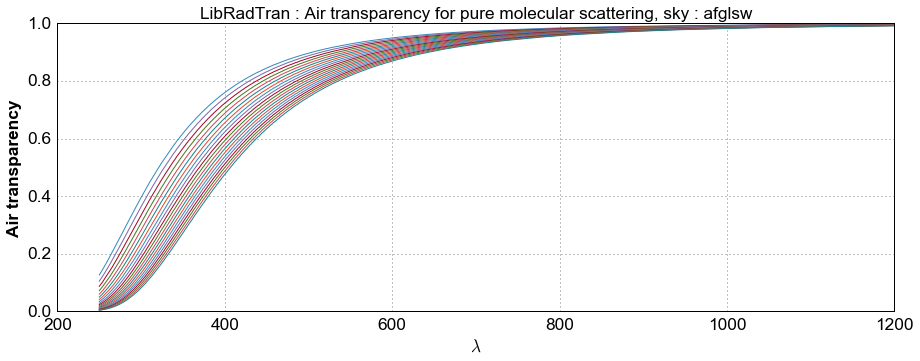

In [9]:
for filename in filelist_afglsw:
    if not re.search('z10',filename): #example of filename filter
        fullpath=os.path.join(rootpath_sw,filename)
        data = np.loadtxt(fullpath)
        x=data[:,0]
        y=data[:,1]
        plt.plot(x,y)
    
plt.xlim(200,1200)
plt.xlabel('$\lambda$')
plt.ylabel('Air transparency')   
plt.title('LibRadTran : Air transparency for pure molecular scattering, sky : afglsw')

### Show the air transparences for sky afglus

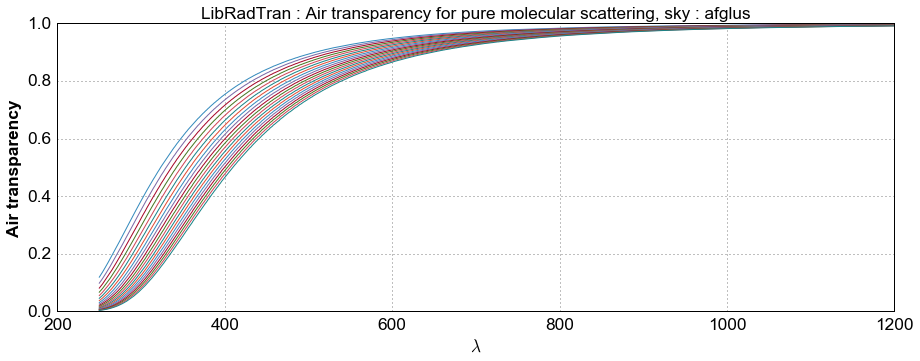

In [10]:
for filename in filelist_afglus:
    if not re.search('z10',filename): #example of filename filter
        fullpath=os.path.join(rootpath_us,filename)
        data = np.loadtxt(fullpath)
        x=data[:,0]
        y=data[:,1]
        plt.plot(x,y)
    
plt.xlim(200,1200)
plt.xlabel('$\lambda$')
plt.ylabel('Air transparency')   
plt.title('LibRadTran : Air transparency for pure molecular scattering, sky : afglus')

## Conclusion

Taking the transparencies ratio $\frac{sw}{us}$ are the same concerning the molecular scattering except in UV and visible

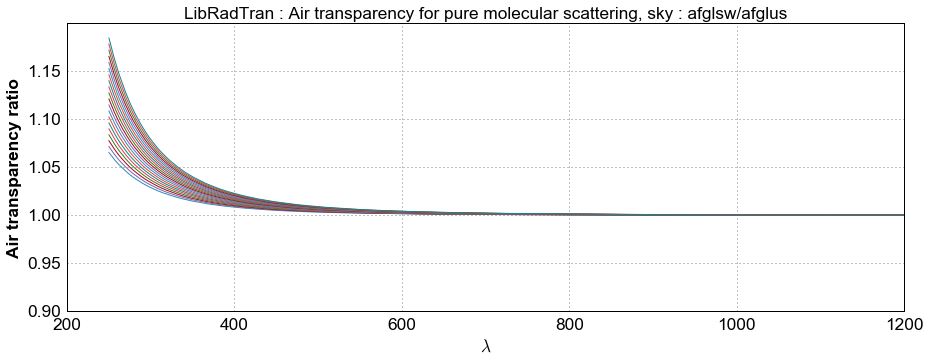

In [12]:
for index,filename1 in np.ndenumerate(filelist_afglus):
    idx=index[0]
    filename2=filelist_afglsw[idx]
    if not re.search('z10',filename1): #example of filename filter
        fullpath1=os.path.join(rootpath_us,filename1)
        fullpath2=os.path.join(rootpath_sw,filename2)
        data1 = np.loadtxt(fullpath1)
        x1=data1[:,0]
        y1=data1[:,1]
        data2 = np.loadtxt(fullpath2)
        x2=data2[:,0]
        y2=data2[:,1]
        ratio=y2/y1
        plt.plot(x1,ratio)
    
plt.xlim(200,1200)
plt.ylim(0.9,1.2)
plt.xlabel('$\lambda$')
plt.ylabel('Air transparency ratio')   
plt.title('LibRadTran : Air transparency for pure molecular scattering, sky : afglsw/afglus')    